In [8]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
df = pd.read_csv('c:/bd092_data/BankPersonalLoan.csv')

df['ID'] = df['ID'].fillna(df['ID'].std())
df['Experience'] = df['Experience'].fillna(df['Experience'].mean())
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [23]:
df1 = df[df['Experience']>0]
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4882 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  4882 non-null   int64  
 1   Age                 4882 non-null   int64  
 2   Experience          4882 non-null   int64  
 3   Income              4882 non-null   int64  
 4   ZIP Code            4882 non-null   int64  
 5   Family              4882 non-null   int64  
 6   CCAvg               4882 non-null   float64
 7   Education           4882 non-null   int64  
 8   Mortgage            4882 non-null   int64  
 9   Personal Loan       4882 non-null   int64  
 10  Securities Account  4882 non-null   int64  
 11  CD Account          4882 non-null   int64  
 12  Online              4882 non-null   int64  
 13  CreditCard          4882 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 572.1 KB


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4882.000000,4882.000000,4882.000000,4882.000000,4882.000000,4882.000000,4882.000000,4882.000000,4882.000000,4882.000000,4882.000000,4882.000000,4882.000000,4882.000000
mean,2496.172061,45.826506,20.605899,73.870750,93150.227366,2.386112,1.935412,1.874846,56.844326,0.096887,0.104056,0.061450,0.598730,0.294961
std,1439.377900,11.155088,11.136704,46.112752,2130.612121,1.148222,1.745065,0.839329,102.009136,0.295833,0.305364,0.240179,0.490206,0.456072
min,1.000000,25.000000,1.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1254.250000,36.000000,11.000000,39.000000,91910.250000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2490.500000,46.000000,21.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3735.750000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.600000,3.000000,101.750000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [32]:
df.mean()
df.info()
df['CCAvg'] = df['CCAvg'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 e

In [33]:
df.drop(['ID', 'Experience', 'ZIP Code'], axis=1, inplace=True)

In [36]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Income              5000 non-null   int64  
 2   Family              5000 non-null   int64  
 3   CCAvg               5000 non-null   float64
 4   Education           5000 non-null   int64  
 5   Mortgage            5000 non-null   int64  
 6   Personal Loan       5000 non-null   int64  
 7   Securities Account  5000 non-null   int64  
 8   CD Account          5000 non-null   int64  
 9   Online              5000 non-null   int64  
 10  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 429.8 KB


,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,73.774200,2.396400,1.513800,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,46.033729,1.147663,1.741728,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,39.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,64.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,98.000000,3.000000,2.000000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [52]:
x = df.drop(['Personal Loan'], axis=1)
y = df['Personal Loan']

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2, stratify=y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4000, 10) (1000, 10) (4000,) (1000,)


In [59]:
stdsc = StandardScaler()
x_train.iloc[:,:] = stdsc.fit_transform(x_train.iloc[:,:])
x_test.iloc[:,:] = stdsc.transform(x_test.iloc[:,:])

C:\Users\Ki beom kim\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-59-8f420a2ece5d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.iloc[:,:] = stdsc.fit_transform(x_train.iloc[:,:])
C:\Users\Ki beom kim\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._se

In [62]:
import statsmodels.api as sm
logit_model = sm.Logit(y_train, x_train).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.619309
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3990
Method:                           MLE   Df Model:                            9
Date:                Fri, 30 Oct 2020   Pseudo R-squ.:                 -0.9586
Time:                        22:21:01   Log-Likelihood:                -2477.2
converged:                       True   LL-Null:                       -1264.8
Covariance Type:            nonrobust   LLR p-value:                     1.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0314      0.034      0.918      0.359      -0.036       0.098
Income                 0.6423      0.049     13.193      0.000       0.547       0.738
Family                 0.2008      0.035      5.752      0.000       0.132       0.269
CCAvg                  0.1070      0.046      2.319      0.020       0.017       0.197
Education              0.3055      0.036      8.599      0.000       0.236       0.375
Mortgage               0.0590      0.037      1.594      0.111      -0.014       0.131
Securities Account    -0.1034      0.038     -2.749      0.006      -0.177      -0.030
CD Account             0.4755      0.050      9.459      0.000       0.377       0.574
Online                -0.0544      0.034     -1.586      0.113      -0.122       0.013
CreditCard            -0.1108      0.036     -3.096      0.002      -0.181      -0.041
======================================================================================
"""

In [75]:
cat = logit_model.params.sort_values(ascending=False)
dog = np.exp(cat).sort_values(ascending=False)
dog

Income                1.900812
CD Account            1.608751
Education             1.357281
Family                1.222412
CCAvg                 1.112916
Mortgage              1.060727
Age                   1.031866
Online                0.947044
Securities Account    0.901773
CreditCard            0.895160
dtype: float64

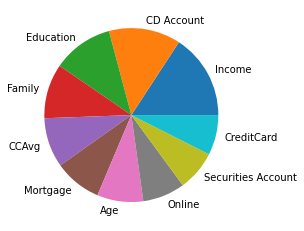

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.pie(dog, labels=dog.index)
plt.show()

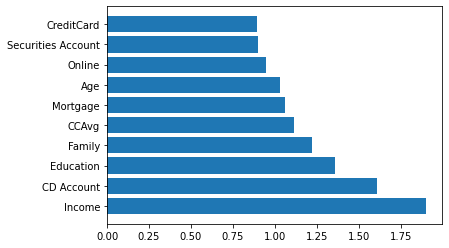

In [81]:
plt.barh(dog.index, dog)
plt.show()

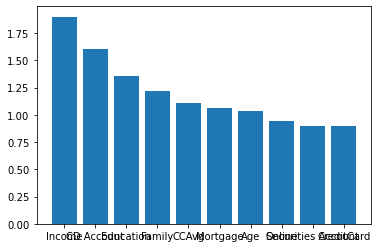

In [84]:
plt.bar(dog.index, dog)
plt.show()